# Modified Gale Shapley Algorithm for Generative Data Comparison

## Set-Up
We'll primarily using pandas to work with the data. We start off by importing pandas and importing the data as a pandas dataframe.

In [14]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
syndata = pd.read_csv('synData9.csv')
realdata = pd.read_csv('kag_risk_factors_cervical_cancer.csv')

In [31]:
realdata.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [32]:
# impute nan instead of ? in the missing values
temp_data = realdata
temp_data[temp_data == '?'] = np.nan

In [38]:
# convert the object types into float
for i in temp_data.columns:
    if(temp_data[i].dtype == 'O'):
        temp_data[i] = temp_data[i].astype('float')
        


In [46]:
age_imp = temp_data['Age'].median()

temp_data.fillna(age_imp, inplace=True)

# columns needing median imputation
age, number of sex partners, first sexual intercourse, number of preg, , smokes(years), smokes (packer/ year), 

# columns needing major imputation
smokes

25.0

In [47]:
temp_data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Number of sexual partners'}>,
        <AxesSubplot:title={'center':'First sexual intercourse'}>,
        <AxesSubplot:title={'center':'Num of pregnancies'}>,
        <AxesSubplot:title={'center':'Smokes'}>,
        <AxesSubplot:title={'center':'Smokes (years)'}>],
       [<AxesSubplot:title={'center':'Smokes (packs/year)'}>,
        <AxesSubplot:title={'center':'Hormonal Contraceptives'}>,
        <AxesSubplot:title={'center':'Hormonal Contraceptives (years)'}>,
        <AxesSubplot:title={'center':'IUD'}>,
        <AxesSubplot:title={'center':'IUD (years)'}>,
        <AxesSubplot:title={'center':'STDs'}>],
       [<AxesSubplot:title={'center':'STDs (number)'}>,
        <AxesSubplot:title={'center':'STDs:condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs:cervical condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs:vaginal condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs

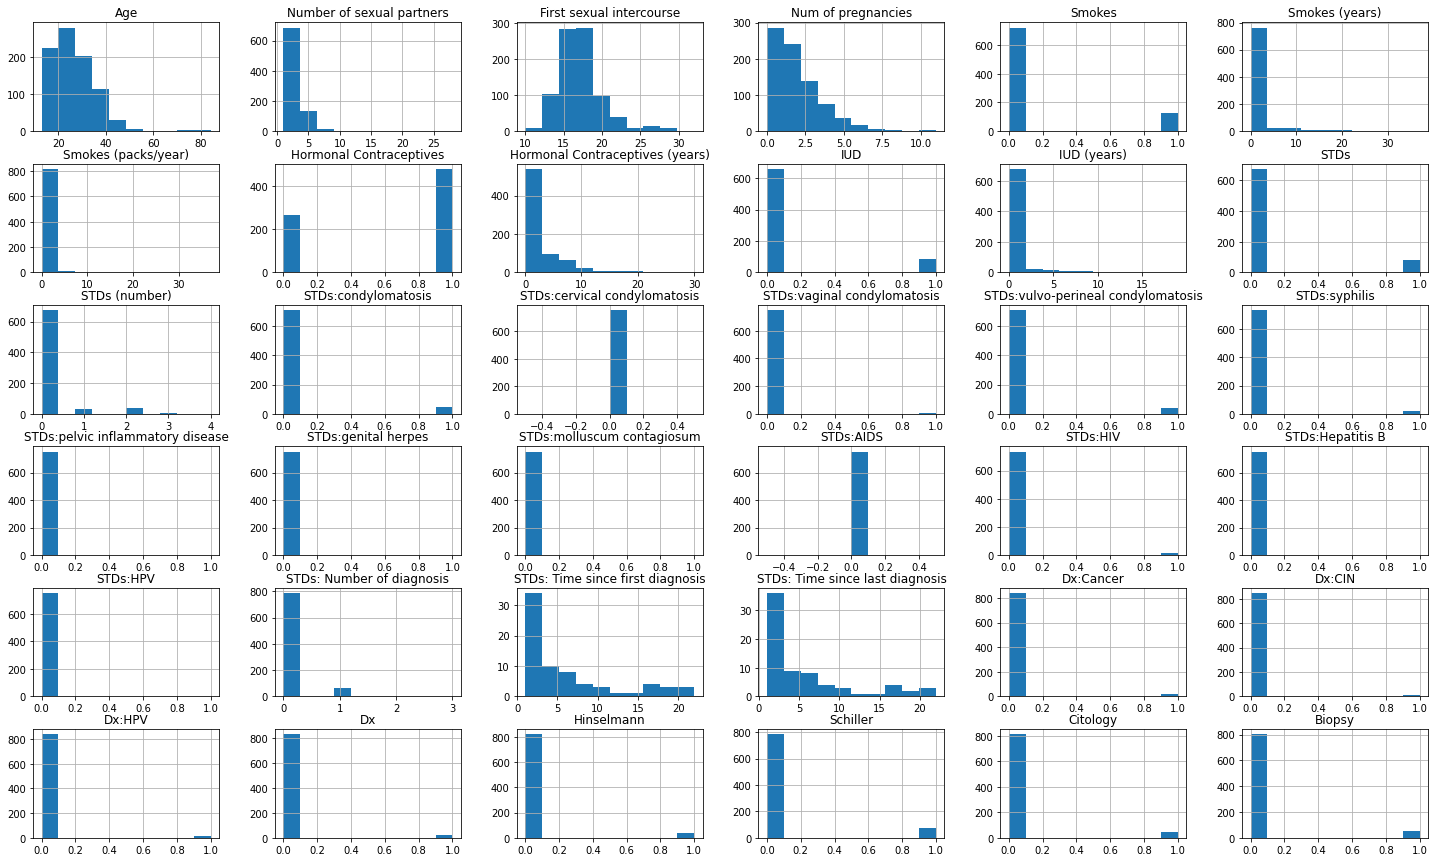

In [41]:
# Rama's code
temp_data.hist(figsize=(25,15))

In [16]:
syndata.iloc[0] #Use this to access a row
syndata.loc[0, : ] #Use this to access a row
x = syndata.loc[0,"Age"] #Use this to access a column
syndata.columns[0]

'Age'

## Information about the dataset

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Number of sexual partners'}>,
        <AxesSubplot:title={'center':'First sexual intercourse'}>,
        <AxesSubplot:title={'center':'Num of pregnancies'}>,
        <AxesSubplot:title={'center':'Smokes'}>,
        <AxesSubplot:title={'center':'Smokes (years)'}>],
       [<AxesSubplot:title={'center':'Smokes (packs/year)'}>,
        <AxesSubplot:title={'center':'Hormonal Contraceptives'}>,
        <AxesSubplot:title={'center':'Hormonal Contraceptives (years)'}>,
        <AxesSubplot:title={'center':'IUD'}>,
        <AxesSubplot:title={'center':'IUD (years)'}>,
        <AxesSubplot:title={'center':'STDs'}>],
       [<AxesSubplot:title={'center':'STDs (number)'}>,
        <AxesSubplot:title={'center':'STDs:condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs:cervical condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs:vaginal condylomatosis'}>,
        <AxesSubplot:title={'center':'STDs

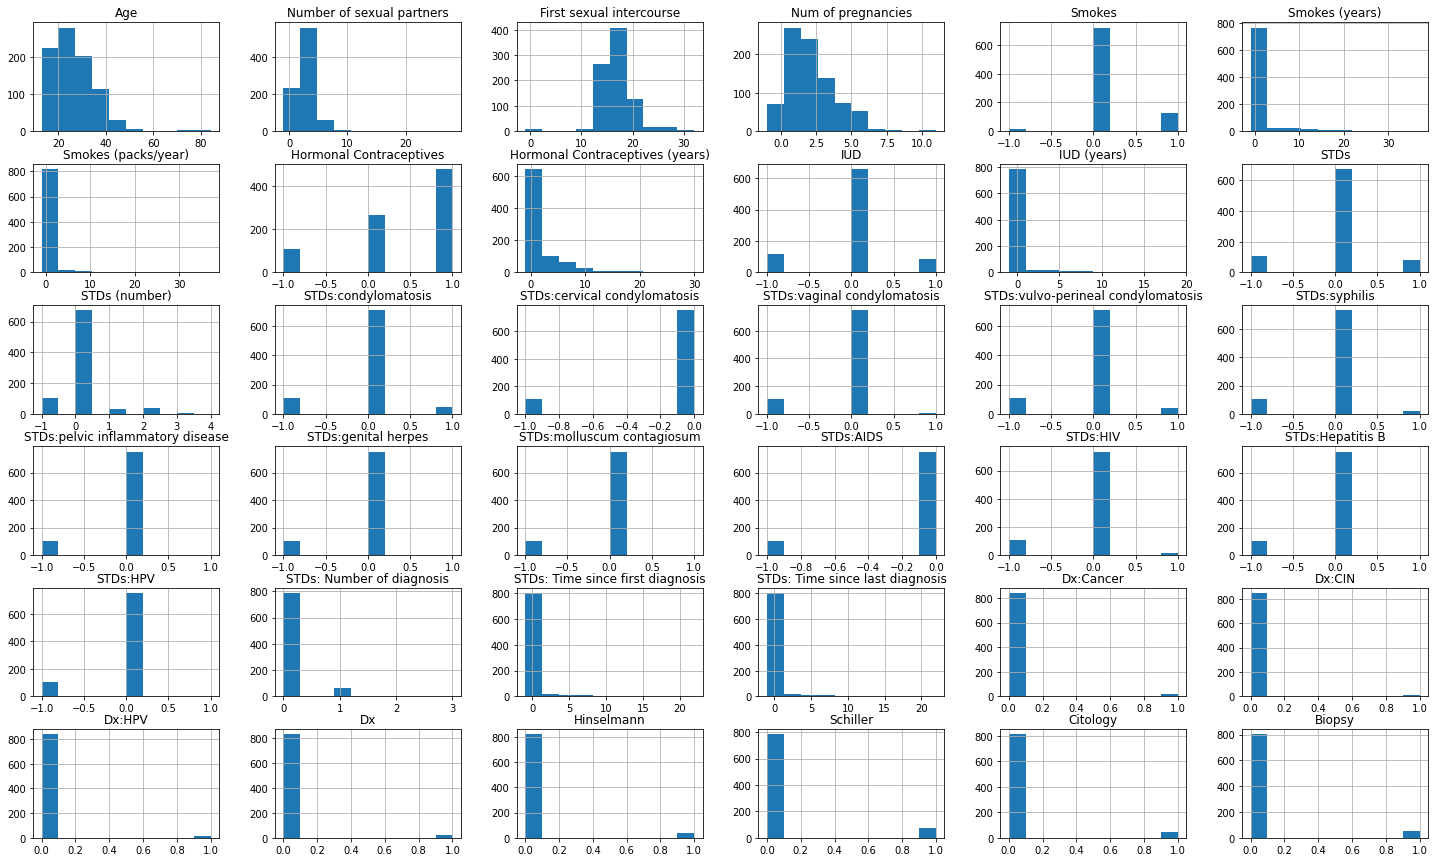

In [28]:
realdata_clean.hist(figsize=(25,15))

## Data Cleaning and Helper Functions
We need to clean up the data before we use it. Primarily, this means we will need to do some normalization to the data.

One important thing we may need later on is the means for each of the columns. First, we compute mean for the raw data.

In [17]:
def mean_for_column(data1, column):
    """
    Finds the mean for a specific column
    """
    tot = 0 
    for i in range(len(data1)):
        #print(data1.loc[i, column])
        if data1.loc[i, column] == "?" or data1.loc[i, column] == -1:
            pass
        else:
            tot = tot + float(data1.loc[i, column])
    tot = tot/(len(data1))
    return tot
    
def mean_for_cols(data1):
    """
    Computes the mean for all the columns 
    """
    ar = []
    for col in data1.columns: 
        ar.append(mean_for_column(data1, col))
    return ar
    
def clean(data1):
    """
    Replaces the missing data with a -1 value and converts the strings into floats
    """
    for i in range(len(data1)):
        for f in data1.columns:
            #print(data1.loc[i, f])
            if data1.loc[i, f] == "?":
                data1.loc[i, f] = float(-1)
                continue 
            if isinstance(data1.loc[i, f], str):
                data1.loc[i, f] = float(data1.loc[i, f])
    data1 =data1.set_axis([f for f in range(len(data1))], axis='index')
    #print(data1.dtypes)
    return data1.astype('float')
    
def norm(data1):
    """
    Min-Max normalizes the data
    """
    new_dat = data1.copy()
    for col in new_dat.columns:
        new_dat[col] = (new_dat[col] - new_dat[col].min()) / (new_dat[col].max() - new_dat[col].min())
    return new_dat

In [18]:
syndata_means = mean_for_cols(syndata)
realdata_means = mean_for_cols(realdata)

#Back up of the data
syndata_safe = syndata 
realdata_safe = realdata

realdata_clean = clean(realdata)
syndata_clean = clean(syndata)

realdata = realdata_safe
syndata = syndata_safe


#For syndata
syndata_clean_norm = norm(syndata_clean)
#For realdata
realdata_clean_norm = norm(realdata_clean)

syndata_clean_norm = syndata_clean_norm.fillna(-1)
realdata_clean_norm = realdata_clean_norm.fillna(-1)
#They both should be False, this is important
syndata_clean_norm.isnull().values.any(), realdata_clean_norm.isnull().values.any()

(False, False)

## Weights

In [19]:
#We start of by getting the column names
#print(realdata_clean_norm.columns)
#print(syndata_clean_norm.columns)

In [20]:
#They're the same so we use 1 single column array
cols = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy']

#Init
real_weights =[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
syn_weights =[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
test_weights =[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
    1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
    
high_weights =['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes']
med_weights =['Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis']
low_weights =['STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy']

for i in range(len(cols)):
    if cols[i] in high_weights:
        real_weights[i] = 3
        syn_weights[i] = 3
    if cols[i] in med_weights:
        real_weights[i] = 2
        syn_weights[i] = 2
    if cols[i] in low_weights:
        real_weights[i] = 1
        syn_weights[i] = 1

## Comparison Function
The comparison function is the main function that compares the data. It compares all the synthetic data to one specific row of the real data and creates an array of the most similar matches.

We also compute the values without using the functions.

In [21]:
def compare(data1, data2, row_comp, weights, mini=False):
    """
    This is a comparsion function  
    data1: First dataset for comparsion, 1 set row
    data2: Second dataset for comparsion
    row_comp: The row we want compared
    mini: Chooses if the function returns the minimum value or not
    """
    #Goes for 1 section of the real data and then loops for every row of the synthesized data
    lst = []
    for i in range(len(data2)):
        #print('Real data: ' + str(data1.loc[row_comp, "Age"]) + '. Fake data: ' +str(data2.loc[i, 'Age']))
        #Comparsion function to compare each the set real row to current fake row
        lst.append(similiar(data1, data2, i, row_comp, weights))
    if mini:
        lst = min(lst)
    return lst

def similiar(data1, data2, ind, row_comp, weights):
    """
    Computes how similiar the two datasets are 
    """
    score = 0
    for i in range(len(data1.columns)):
        score = score + (abs(data1.loc[row_comp,:][i] - data2.loc[ind,:][i]) * weights[i])
        #print(data1.loc[row_comp,:] - data2.loc[ind,:])
    return score 


def compNew(data1, data2, row_comp, weights):
    lst = []
    
    for i in range(len(data2)):
        score = 0
        for y in range(len(data1.columns)):
            score = score + (abs(data1.loc[row_comp,:][y] - data2.loc[i,:][y]) * weights[y])
        lst.append(score)
    return lst

In [ ]:
# haming distance for all the binary variables
# binary variables need not be normalized
# other variables should be normalized

cont_columns = ['Age','Number of sexual partners']
bin_columns = ['STD AIDS', 'Smokes']

np.matmul((realdata_clean_norm.loc[0,:] - syndata_clean_norm.loc[0,:]), np.transpose(test_weights))

weights_cont_cols = weights[indices of those columns]

np.matmul(abs(syn_data[cont_columns] - real_data[cont_columns]))* np.transpose(weights_cont_cols)

(N X 10 - N X 10)

synd(1) reald(1)
synd(1) reald(2)

for i,row in synth_data.iterows():
    #This currently accesses all of the rows in real data 

    # for each row in synthetic data, we will compute the distance with "all" the rows in real data
    distance (N X 1)= np.matmul((abs(row - real_data[cont_columns])), np.transpose(weights_cont_cols))
    # where N is the elements in real_data

    np.transpose()



In [22]:
test_weights

[3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [23]:
np.matmul((realdata_clean_norm.loc[0,:] - syndata_clean_norm.loc[0,:]), np.transpose(test_weights))

7.98009500392755

In [24]:
#Data Splitting
syndata_clean_norm_split = np.array_split(syndata_clean_norm, 100)
realdata_clean_norm_split = np.array_split(realdata_clean_norm, 17)
realsplit1 = realdata_clean_norm_split[0]
synsplit1 = syndata_clean_norm_split[0]
realsplit1 = realsplit1.drop(50)
len(realsplit1), len(synsplit1)

(50, 50)

In [25]:
xasda = compNew(synsplit1, realsplit1, 0, test_weights)
xasda

[19.710627216812703,
 19.389415936592197,
 20.33498429624506,
 26.069080249828072,
 22.50293637902974,
 21.365202841932277,
 24.8675738462677,
 22.410462155253132,
 23.419975048841444,
 21.929462759781494,
 22.453619952611998,
 20.97808224529485,
 22.683143841487432,
 22.189370112722557,
 21.999462632651515,
 21.81002131287524,
 21.83597726431177,
 21.776957829334698,
 22.56483374495584,
 22.240883887453055,
 22.000000267060116,
 23.54925335255465,
 23.005456761320712,
 24.442578410949576,
 21.23353059928775,
 21.069406853882768,
 21.995338830276136,
 20.756206123902054,
 21.808177660540903,
 22.228405186074323,
 22.599505528039145,
 23.00833256780496,
 23.42790804749733,
 21.626124874617147,
 22.331596786548506,
 21.91573875536006,
 21.28846418841818,
 21.359068260486005,
 21.44675695238391,
 21.383355628947964,
 21.016116158824225,
 23.956713640831893,
 22.1272914616837,
 20.649560503050505,
 23.76667125523144,
 21.941697268769026,
 20.745680061730805,
 21.537853584422752,
 22.190713

In [26]:
synD = [str(i+1) for i in range(50)]
realD = [str(i+1) for i in range(50)]

In [27]:
heatscores=[]

for i in range(len(realsplit1)):
    heatscores.append(compNew(synsplit1, realsplit1, i, test_weights))


In [ ]:

fig, ax = plt.subplots()
im = ax.imshow(heatscores)


ax.set_xticks(np.arange(len(realD)), labels=realD)
ax.set_yticks(np.arange(len(synD)), labels=synD)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Syn vs Real")

plt.colorbar(im, ax=ax)


plt.show()

In [ ]:
heatscores2=[]

for i in range(len(realsplit1)):
    heatscores2.append(compNew(realsplit1, realsplit1, i, test_weights))


In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(heatscores2)


ax.set_xticks(np.arange(len(realD)), labels=realD)
ax.set_yticks(np.arange(len(realD)), labels=realD)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


ax.set_title("Syn vs Real")

plt.colorbar(im, ax=ax)


plt.show()

Try to rank based on how similar. Put fake one that closest to the real one closest to that

Calling each columns with [,:] and then indexing into it with [i]
The columns are being called already but the values within the columns are not being called. That is what this i is doing


We don't need to compare element by element, we can do a vector comparison. 


.* for element by element for 2 vectors


Or use matrix multiplication (might need to transpose weights)




## The Old Method

In [ ]:
compare_arr = compare(realdata_clean_norm,syndata_clean_norm, 0, test_weights)

In [ ]:
#big_comp = []

In [ ]:
for i in range(len(realdata_clean_norm)):
    x = compare(realdata_clean_norm,syndata_clean_norm, i, test_weights)
    big_comp.append(x)

#Took 511m 43.3s .....

In [ ]:
len(big_comp)

In [ ]:
import numpy as np

arr = np.array(big_comp)
index_values = []
for i in range(858):
    index_values.append(i)
column_values = []
for i in range(5000):
    column_values.append(i)

In [ ]:
df = pd.DataFrame(data = arr, 
                  index = index_values, 
                  columns = column_values)

In [ ]:
df.to_csv('data.csv', index=True)

In [ ]:
ival = []
for i in range(5000):
    ival.append(i)

In [ ]:
min(compare_arr)
compare_arr.index(18.114858335405216)
syndata_clean.iloc[509, :]

In [ ]:
"""
#How to access the number from a specific column and row
syndata_clean_norm.loc[0,:"Age"][0]
#Goes through each column iteritvely of the synthetic data row that's closest with the first row of the real data
for i in range(36):
    print("Fake: " + str(syndata.iloc[509][i]) + ". Real: " + str(realdata.iloc[0][i]))
#How to find the minimium of the compare_arr and figure out the location 
min(compare_arr)
compare_arr.index(18.114858335405216)
"""

In [ ]:
score = 0
for i in range(len(syndata_clean_norm.columns)):
    #print(realdata_clean_naorm.loc[0,:])
    score = score + ((realdata_clean_norm.loc[0,:][i] - syndata_clean_norm.loc[0,:][i])) #* weights[i])

sy = [12,2,12,3,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
re = [18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1,-1,0,0,0,0,0,0,0,0]
ar = [syndata_clean_norm.loc[0,:][i] for i in range(len(syndata.columns))]
ar2 = [realdata_clean_norm.loc[0,:][i] for i in range(len(syndata.columns))]

sum = 0
for i in range(len(sy)):
    sum = sum + abs(ar2[i] - ar[i])
    
assert sum == compare_arr[0], "Not working"

## Ranking
Now that we've made the comparison function, we need a function that creates a threshold that decides if the data is similar enough

In [ ]:
def Average(l):
    result = 0
    for i in range(len(l)):
        result = result + l[0]
    result = result/len(l)
    return result

In [ ]:
compare_arr_avg = Average(compare_arr)
compare_arr_avg, min(compare_arr), max(compare_arr)

## Gale Shapley 

heatscores #The comparison arrays (50 x 50)

synsplit1 #The synthetic data data

realsplit1 #The real data

In [ ]:
from collections import Counter
from copy import copy

In [ ]:
heatscores2 = heatscores

In [ ]:
def rank(ar):
    """
    Takes in an array, ranks it and returns it
    """
    old_ar = ar
    sorted_ar = sorted(ar)
    for i in range(len(ar)):
        ind_in_old = old_ar.index(sorted_ar[i])
        old_ar[ind_in_old] = i


    return old_ar

def synrank(ar):
    """
    The ranking algo with changing shape of arrays
    """
    new_ar = []
    for j in range(len(ar[0])):
        curr_ar = []
        for i in range(len(ar)):        
            curr_ar.append(ar[i][j])
        new_ar.append(curr_ar)

    
    return new_ar

In [ ]:
dictR = {}
dictS = {}

keys = range(50)
for i in keys:
    dictR[i] = rank(heatscores2[i])
    dictS[i] = rank(synrank(heatscores2)[i])

In [ ]:
dictS

In [ ]:
women_df = pd.DataFrame(dictS)
women_df.index = man_list

In [ ]:
man_df = pd.DataFrame(dictR)
man_df.index = man_list

In [ ]:
# dict to control which women each man can make proposals
women_available = {man:women_list for man in man_list}
# waiting list of men that were able to create pair on each iteration
waiting_list = []
# dict to store created pairs
proposals = {}
# variable to count number of iterations
count = 0 

In [ ]:
# while not all men have pairs
while len(waiting_list)<len(man_list):
    # man makes proposals
    for man in man_list:
        if man not in waiting_list:
            # each man make proposal to the top women from it's list
            women = women_available[man]
            best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
            proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                 women_df.loc[man][best_choice])
    # if women have more than one proposals 
    # she will choose the best option
    overlays = Counter([key[1] for key in proposals.keys()])
    # cycle to choose the best options
    for women in overlays.keys():
        if overlays[women]>1:
            # pairs to drop from proposals
            pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                    if women in pair}.items(), 
                   key=lambda x: x[1][1]
                  )[1:]
            # if man was rejected by woman
            # there is no pint for him to make proposal 
            # second time to the same woman
            for p_to_drop in pairs_to_drop:
                del proposals[p_to_drop[0]]
                _women = copy(women_available[p_to_drop[0][0]])
                _women.remove(p_to_drop[0][1])
                women_available[p_to_drop[0][0]] = _women
    # man who successfully created pairs must be added to the waiting list 
    waiting_list = [man[0] for man in proposals.keys()]
    # update counter
    count+=1

In [ ]:
from matching.algorithms import galeshapley
matching = galeshapley(dictS, dictR)
matching